# Kasra Samadi 993623030


# Spam Filter Creation using Naive Bayes

In this exercise, you will create a spam filter using the Naive Bayes classifier. This exercise will help you understand how to preprocess text data, implement a Naive Bayes model, and evaluate its performance.

## Instructions

Complete the code in the sections marked `# TODO`. Make sure to run each cell in order to see the output of your code.



## Step 1: Data Loading and Preprocessing

First, we need to load and preprocess our dataset. The dataset consists of emails categorized into 'spam' and 'non-spam'.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# TODO: Load the dataset
dataset = pd.read_csv('Dataset\\spam_ham_dataset.csv')
dataset

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [3]:
df = dataset.copy()
# Preprocessing
df['text'] = df['text'].str.lower()  # Convert to lowercase
df['text'] = df['text'].str.replace('[^\w\s]', '', regex=True)  # Remove punctuation marks

In [4]:
# Tokenization and removing stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Preprocess the x data using CountVectorizer and deleting stop words
stopwords = set(ENGLISH_STOP_WORDS)
vectorizer = CountVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(df['text'])


## Step 2: Feature Extraction

Now, we'll convert the text data into numerical features using techniques like TF-IDF.


In [5]:
# TODO: Implement feature extraction
from sklearn.feature_extraction.text import TfidfTransformer

# Convert text (X) to numerical features using TF-IDF
TF_IDF = TfidfTransformer()
X = TF_IDF.fit_transform(X)

y = df['label']

In [6]:
from sklearn.model_selection import train_test_split
# split X and y to x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


## Step 3: Model Training

Next, implement and train the Naive Bayes classifier using the features extracted in the previous step.


In [7]:
# TODO: Implement and train the Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

# Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

# prediction on x_test
y_pred = classifier.predict(x_test)


## Step 4: Model Evaluation

Evaluate the performance of your model. Calculate metrics like accuracy, precision, and recall.


In [8]:
# TODO: Evaluate the model (calculate accuracy, precision, recall)
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
print("accuracy score for x test prediction: ", accuracy_score(y_test, y_pred))
print("f1 score for x test prediction: ", f1_score(y_test, y_pred, average='weighted'))
print("recall score for x test prediction: ", recall_score(y_test, y_pred, average='weighted'))
print("precision score for x test prediction: ", precision_score(y_test, y_pred, average='weighted'))

accuracy score for x test prediction:  0.9207729468599034
f1 score for x test prediction:  0.9163453152404689
recall score for x test prediction:  0.9207729468599034
precision score for x test prediction:  0.9286381022563778


### confusion_matrix with y_test and y_pred

<AxesSubplot:>

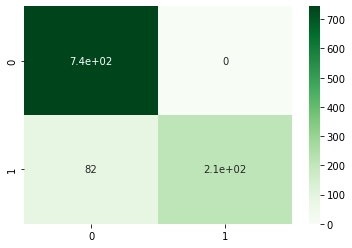

In [9]:
con_matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(con_matrix,annot=True, cmap="Greens")

### save to csv

In [10]:
y_pred_df = pd.DataFrame(y_pred,columns=['Spam'])
y_pred_df.to_csv("Q3.csv",index=False)